In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import math
import scipy.optimize as spo
from util import *

In [2]:
def run_indicators():
    # Define a date range
    
    start_date = dt.datetime(2020,9,1)
    end_date = dt.datetime(2020,12,1)
    dates = pd.date_range(start_date,end_date) # the year 2008
    #Read in more stocks 
    #symbols = ['GOOG', 'AAPL', 'GLD', 'XOM']
    symbols = ['JPM']
    #Normalized Prices
    normed_syms_price,normed_SPY_price  = normalized_portfolio(start_date,end_date,symbols)
    
    #call get_indicators    
    stock_indicators=get_indicators(normed_syms_price,symbols)
    # Plot raw data +rollingmean +std + Bollinger Bands, retain matplotlib axis object
    ax = stock_indicators.plot(title ="Stock Rolling Indicators",figsize=(18, 7),fontsize=15)
    # Add axis labels and legend
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend(loc='lower right')
    plt.show()
    
    symVsSPY = pd.DataFrame(index=stock_indicators.index)
    symVsSPY[symbols] =normed_syms_price
    symVsSPY['SPY']   =normed_SPY_price
    plot_data(symVsSPY)
    
    # Compute daily returns
    daily_returns = compute_daily_returns(symVsSPY)
    plot_data(daily_returns, title="Daily returns", ylabel="Daily returns")
    
    # Compute cumulative returns
    cumulative_returns = compute_cumulative_returns(symVsSPY)
    plot_data(cumulative_returns, title="Cumulative returns", ylabel="Cumulative returns")


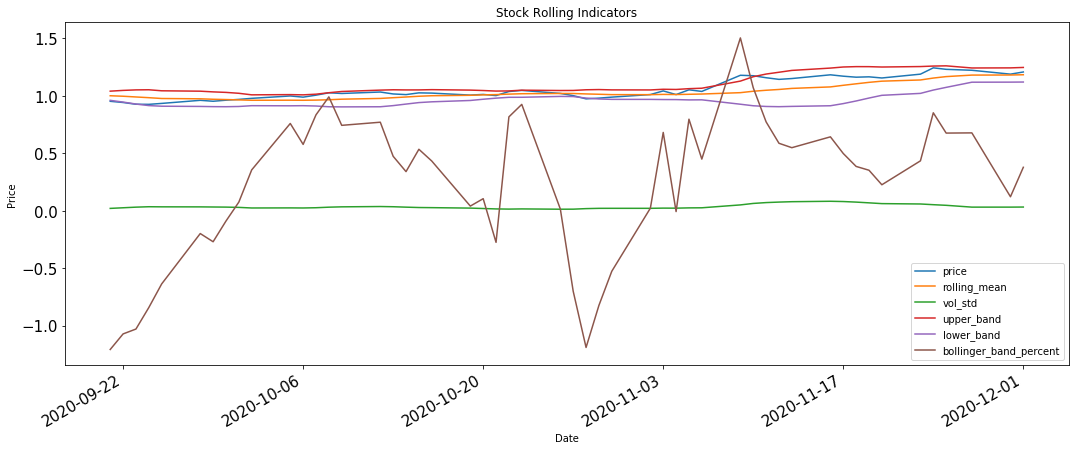

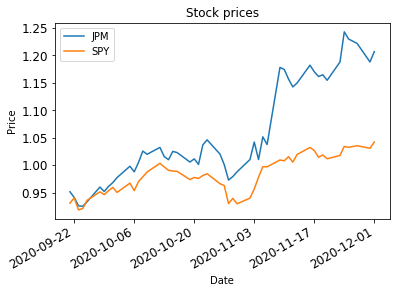

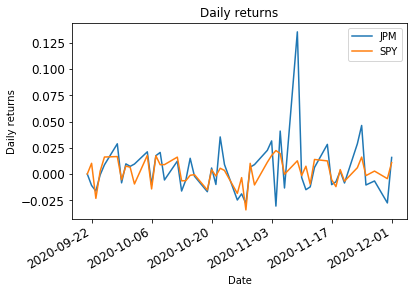

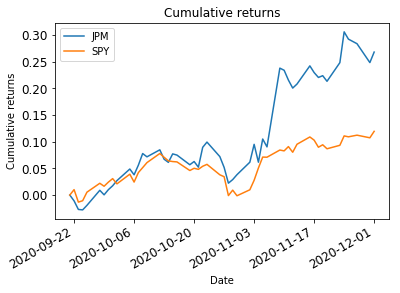

In [3]:
if __name__ == "__main__":
    run_indicators()